In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp

In [10]:
# initial conditions
def phi(x):
    return np.maximum(1-np.abs(x),0)

def dphi(x):
    if x<-1 or x>1:
        return 0
    elif -1<x<0:
        return 1
    elif 0<x<1:
        return -1
    else:
        return 0
    
def psi(x):
    return 0

In [15]:
def iterate_advection_sol(u,a,k,h,method):
    m = np.size(u)
    v = np.zeros(m)
    akh = a*k/h
    
    if method == 0: # Lax-Friedrichs
        for j in range(m):
            v[j] = 1/2*((1-akh)*u[(j+1)%m]+(1+akh)*u[(j-1)%m])
        
    if method == 1: # Upwind
        if a>0:
            for j in range(m):
                v[j] = u[j] - akh*(u[j]-u[(j-1)%m])
        else:
            for j in range(m):
                v[j] = u[j] - akh*(u[(j+1)%m]-u[j])
        
    if method == 2: # Lax-Wendroff
        print(1)
        
        
    if method == 3: # Beam-Warming
        if a>0:
            for j in range(m):
                v[j] = u[j] - akh/2*(3*u[j]-4*u[(j-1)%m]+u[(j-2)%m]) + akh**2/2*(u[j]-2*u[(j-1)%m]+u[(j-2)%m])
        else:
            for j in range(m):
                v[j] = u[j] - akh/2*(-3*u[j]+4*u[(j+1)%m]-u[(j+2)%m]) + akh**2/2*(u[j]-2*u[(j+1)%m]+u[(j+2)%m])

    return v

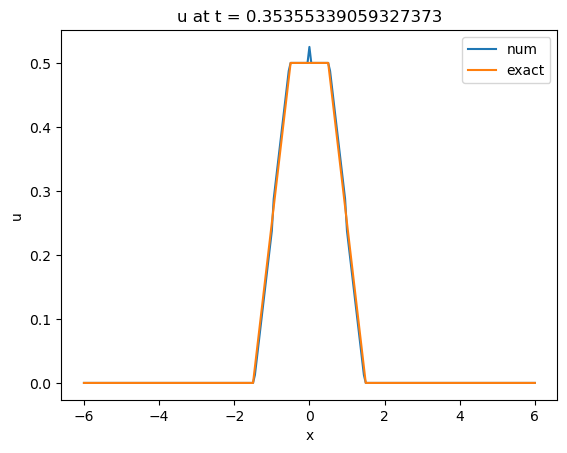

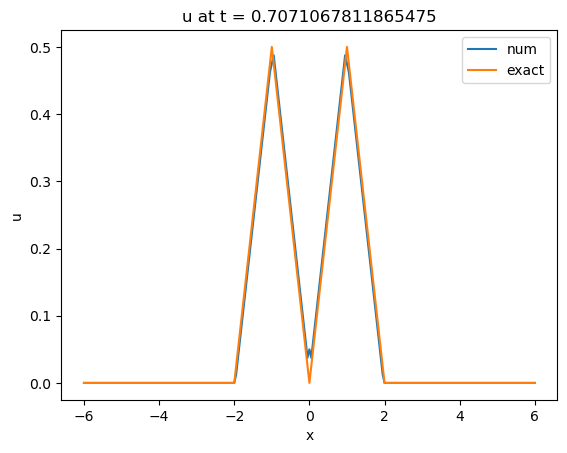

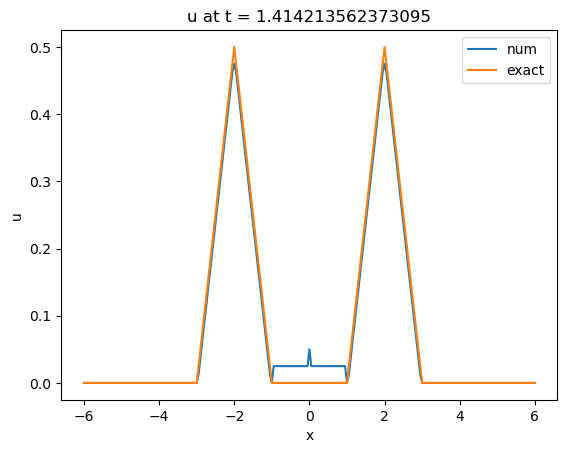

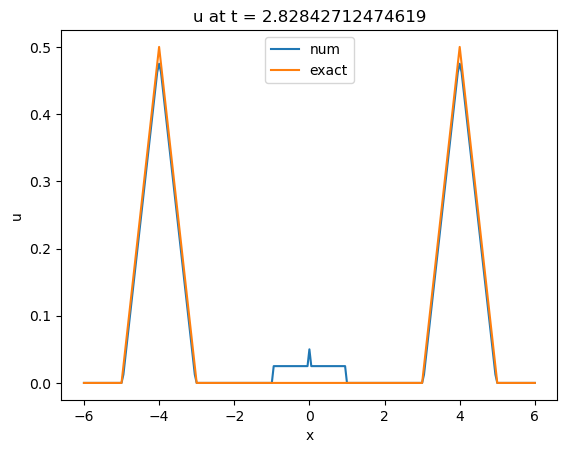

In [33]:
# parameters, mesh, initial conditions
a = np.sqrt(2)
h = 0.05
x_L = -6
x_R = 6
m = int((x_R-x_L)/h)
k = h/a
mesh = np.linspace(x_L,x_R,m+1)
dphi_eval = np.array([dphi(x) for x in mesh])
psi_eval = np.array([psi(x) for x in mesh])
T = 4/a
N = int(T/k)
xi = np.zeros((N+1,m+1))
eta = np.zeros((N+1,m+1))
u = np.zeros((N+1,m+1))
xi[0,:] = 1/(2*a)*(psi_eval+a*dphi_eval)
eta[0,:] = 1/(2*a)*(-psi_eval+a*dphi_eval)
u[0,:] = [phi(x) for x in mesh]

# iterate xi and eta
t_plot = [T/8,T/4,T/2,T]
for method in [0]:
    for n in range(N):
        xi[n+1,:] = iterate_advection_sol(xi[n,:],-a,k,h,method)
        eta[n+1,:] = iterate_advection_sol(eta[n,:],a,k,h,method)
        f = xi[[n,n+1],:] - eta[[n,n+1],:]
        u[n+1,:] = u[n,:] + a*k/2*(f[0,:]+f[1,:])
        t = (n+1)*k
        if t in t_plot:
            plt.plot(mesh,u[n+1,:],label='num')
            u_exact = [1/2*(phi(x+a*t)+phi(x-a*t)) for x in mesh]
            plt.plot(mesh,u_exact,label='exact')
            plt.legend()
            plt.xlabel('x')
            plt.ylabel('u')
            plt.title('u at t = {}'.format(t))
            plt.show()

In [ ]:
a=np.array([2,5,6,1,2,7])
print(a[[0,2,5]])